In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [3]:
sinwave = 2.5 + np.sin(np.arange(0, 10000, 0.45))

# 3 Genauigkeit der AD-Wandlung 0-10V

In [21]:
powersupply,keithley,voltcraft,pico,wandler = np.genfromtxt(os.getcwd() + "/Messdaten/AD0-10.csv", delimiter=";", skip_header=1, usecols=(0,1,2,3,4)).T

vc_fehler =  keithley - voltcraft
pico_fehler = keithley - pico
wandler_fehler = keithley - wandler

quantiFehlerTheo = (10 - (-10)) / math.pow(11, 2)

def std(fehler):
    n = len(fehler)
    return np.sqrt(np.sum(np.power(fehler, 2)) * (1/(n-1)))

print(f"theoretischen Quantisierungsfehler: {quantiFehlerTheo} V")
print("Messfehler voltcraft:", std(vc_fehler))
print("Messfehler Picoscope:", std(pico_fehler))
print("Messfehler Wandler:", std(wandler_fehler))

theoretischen Quantisierungsfehler: 0.1652892561983471 V
Messfehler voltcraft: 0.01048808848170117
Messfehler Picoscope: 0.040004166449674895
Messfehler Wandler: 0.006155395104206213


### Standartabweichung

In [24]:
powersupply,keithley,voltcraft,pico,wandler = np.genfromtxt(os.getcwd() + "/Messdaten/AD0-5.csv", delimiter=";", skip_header=1, usecols=(0,1,2,3,4)).T

vc_fehler =  keithley - voltcraft
pico_fehler = keithley - pico
wandler_fehler = keithley - wandler

quantiFehlerTheo = (5 - 0) / math.pow(len(powersupply), 2)

def std(fehler):
    n = len(fehler)
    return np.sqrt(np.sum(np.power(fehler, 2)) * (1/(n-1)))

print(f"theoretischen Quantisierungsfehler: {quantiFehlerTheo} V")
print("Messfehler voltcraft:", std(vc_fehler))
print("Messfehler Picoscope:", std(pico_fehler))
print("Messfehler Wandler:", std(wandler_fehler))

theoretischen Quantisierungsfehler: 0.06172839506172839 V
Messfehler voltcraft: 0.012379418403140012
Messfehler Picoscope: 0.038773380043529905
Messfehler Wandler: 0.008418729120241351


### 4 Sinusschwinung

In [36]:
zeit, voltage = np.genfromtxt(os.getcwd() + "/Messdaten/DA-SinusSchwingung.csv", delimiter=";", skip_header=3, usecols=(0,1)).T


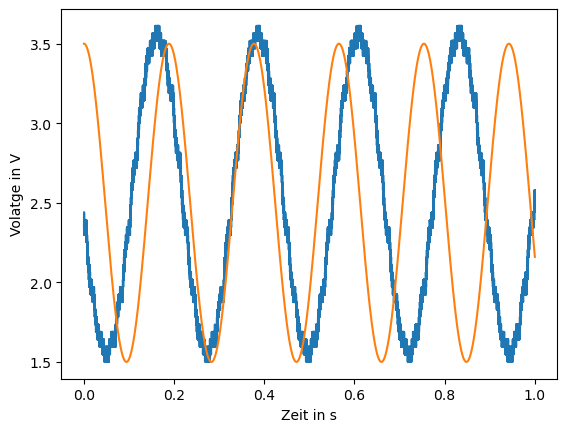

In [55]:
plt.plot(zeit, voltage)
plt.xlabel("Zeit in s")
plt.ylabel("Volatge in V")
plt.plot(zeit, [np.cos(i/30000)+2.5 for i in range(len(zeit))])
plt.show()

 5

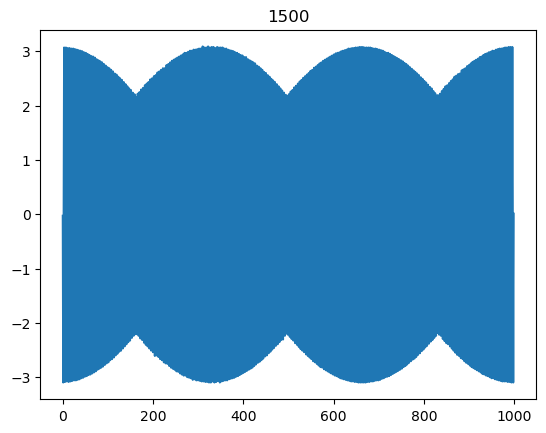

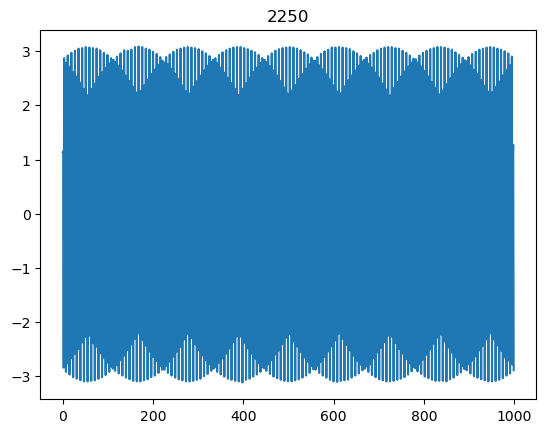

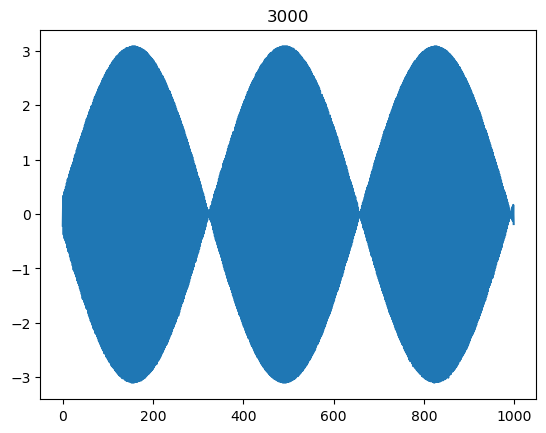

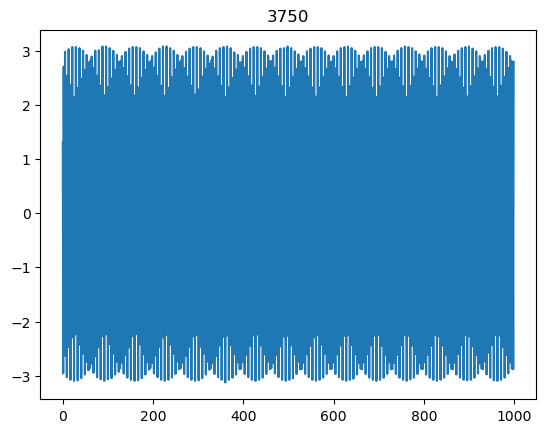

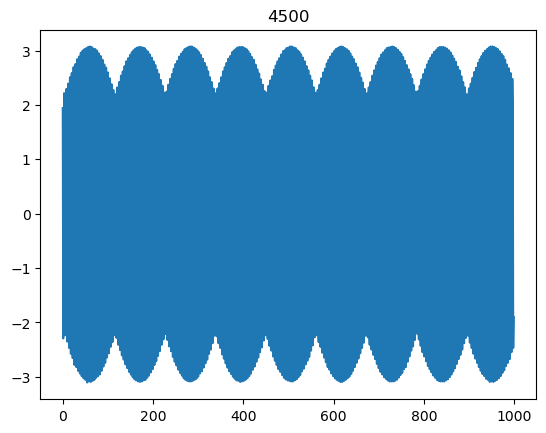

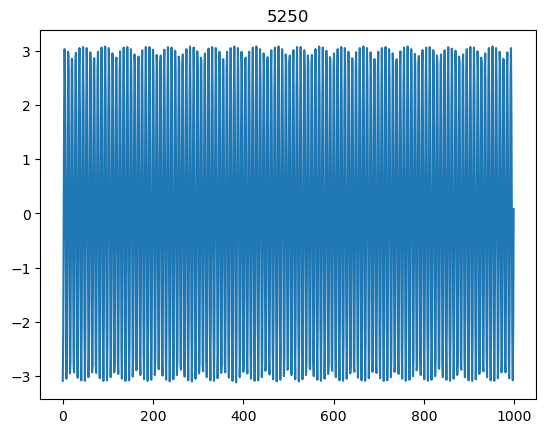

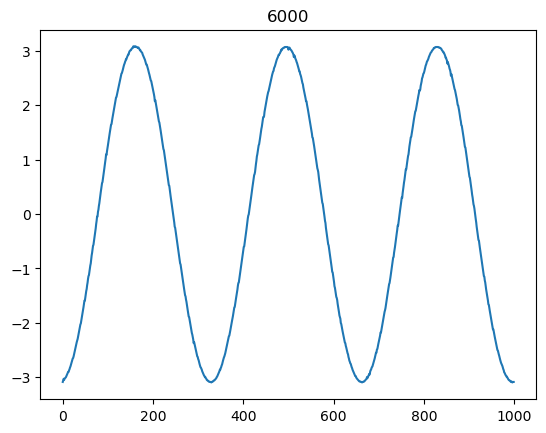

In [69]:
data = {}
for i in np.arange(1500, 6750, 750):
    data[i] = np.load(os.getcwd() + f"/Messdaten/data{i}.npy")

for i, (k, v) in enumerate(data.items()):
    # plt.subplot(3,3,i+1)
    plt.plot(v)
    plt.title(k)
    plt.show()